In [106]:
# steps 1 : laod the dataset 
import pandas as pd
# Load the dataset
dataset_url = "Data/onlinedeliverydata.csv "  # Replace with the actual URL or file path
df = pd.read_csv(dataset_url)

# Display the initial information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [107]:
# 2. Handling missing values from the columns 
df_cleaned = df.dropna()
# Display information after cleaning
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        387 non-null    int64  
 1   Gender                                     387 non-null    object 
 2   Marital Status                             387 non-null    object 
 3   Occupation                                 387 non-null    object 
 4   Monthly Income                             387 non-null    object 
 5   Educational Qualifications                 387 non-null    object 
 6   Family size                                387 non-null    int64  
 7   latitude                                   387 non-null    float64
 8   longitude                                  387 non-null    float64
 9   Pin code                                   387 non-null    int64  
 10  Medium (P1)                    

In [108]:
# 3.  Save the cleaned dataset to a new file
df_cleaned.to_csv("Data/cleaned_dataset.csv", index=False)

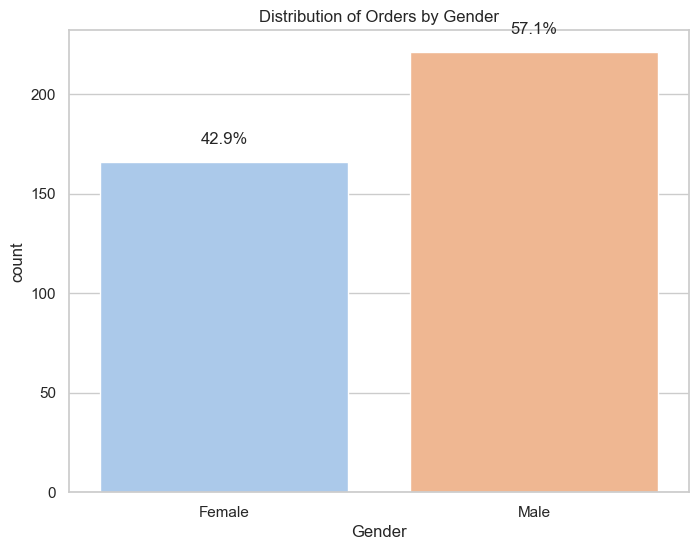

In [109]:
# Step 4: Analyze Based on Gender and Plot Pie Chart
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for Seaborn
sns.set(style="whitegrid")

# Analyze based on gender
gender_counts = df_cleaned['Gender'].value_counts()

# Plot a countplot using Seaborn ,hue="Gender" => to plot the ORIGINAL-APPEARANCE OF PLOT , OTHERWISE FUTURE-WARNING 
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=df_cleaned, palette="pastel", hue='Gender', dodge=False)

# Adding percentage labels to the bars
total_orders = len(df_cleaned)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_orders)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total_orders
    # male and female should exactly be below the x-axis and at center of the each bar, so ha and va
    ax.text(x, y, percentage, ha='center', va='bottom')

plt.title('Distribution of Orders by Gender')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

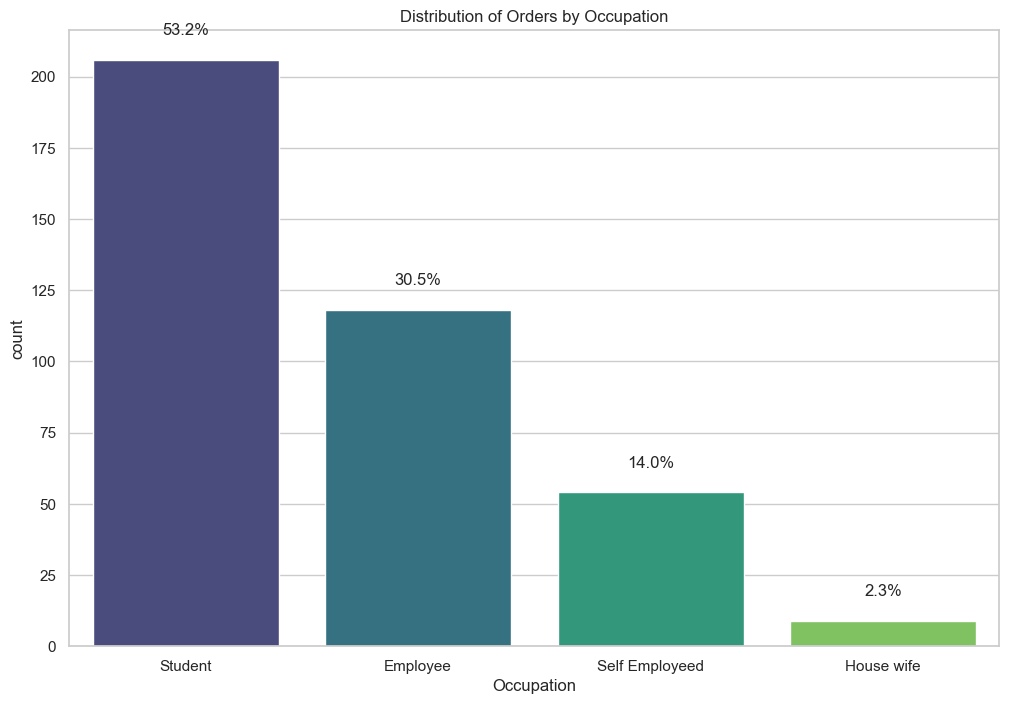

In [110]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Analyze based on occupation
occupation_counts = df_cleaned['Occupation'].value_counts()

# Plot a countplot using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Occupation', data=df_cleaned, palette="viridis", hue='Occupation', dodge=False)

# Adding percentage labels to the bars
total_orders = len(df_cleaned)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_orders)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total_orders
    ax.text(x, y, percentage, ha='center', va='bottom')

plt.title('Distribution of Orders by Occupation')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

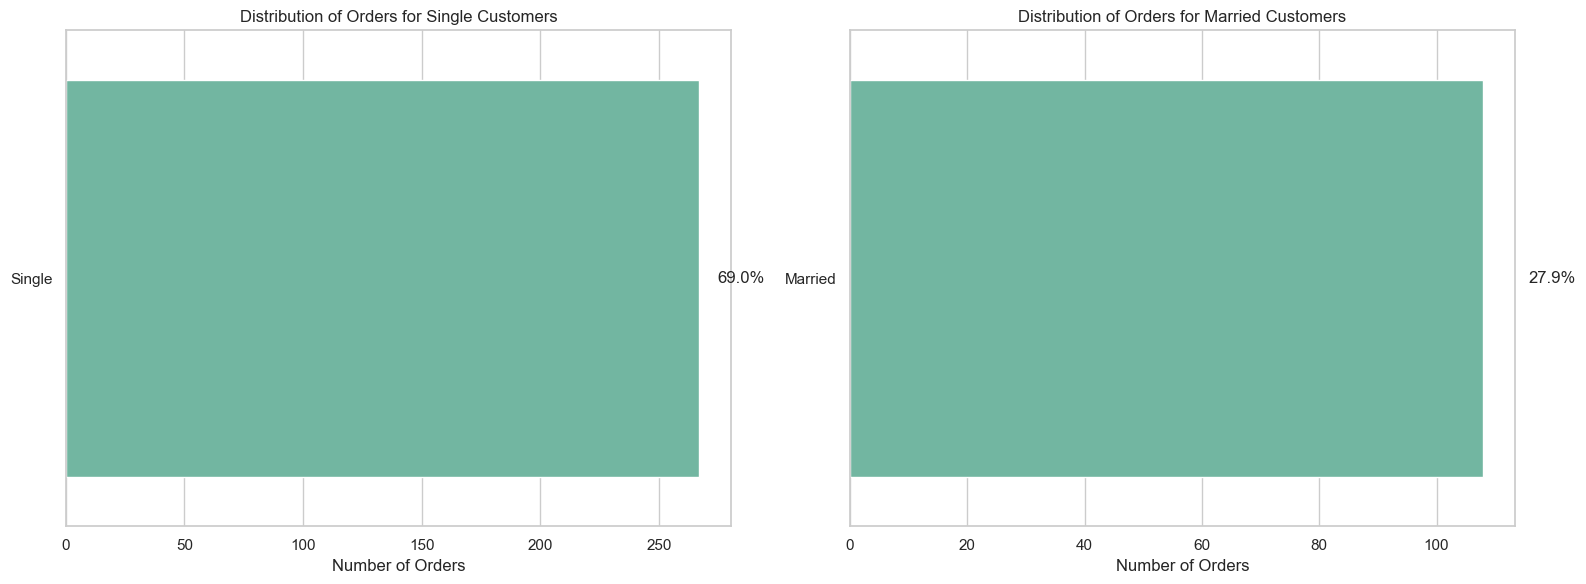

In [111]:
# 6 Classify Based on Marital Status and Plot Horizontal Bar Plot
# Set the style for Seaborn
sns.set(style="whitegrid")

# Analyze based on Marital Status
marital_counts = df_cleaned['Marital Status'].value_counts()

# Plot a horizontal bar plot using Seaborn (both Single and Married in a same row nrows=1, both separate cols ncols=2  )
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subplot for Single ON 1ST COLUM (axes[0])
ax1 = sns.countplot(y='Marital Status', data=df_cleaned[df_cleaned['Marital Status']=='Single'], ax=axes[0], palette="Set2", hue='Marital Status', dodge=False)
ax1.set_title('Distribution of Orders for Single Customers')
ax1.set_xlabel('Number of Orders')
ax1.set_ylabel('')

# Subplot for Married ON 2ND COLUMN (axes[1])
ax2 = sns.countplot(y='Marital Status', data=df_cleaned[df_cleaned['Marital Status']=='Married'], ax=axes[1], palette="Set2", hue='Marital Status', dodge=False)
ax2.set_title('Distribution of Orders for Married Customers')
ax2.set_xlabel('Number of Orders')
ax2.set_ylabel('')

# Adding data labels to the bars
for ax in [ax1, ax2]:
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / len(df_cleaned))
        x = p.get_width() + 0.02 * len(df_cleaned)
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, percentage, ha='left', va='center')

# tight_layout() will also adjust spacing between subplots to minimize the overlaps.
plt.tight_layout()
plt.show()

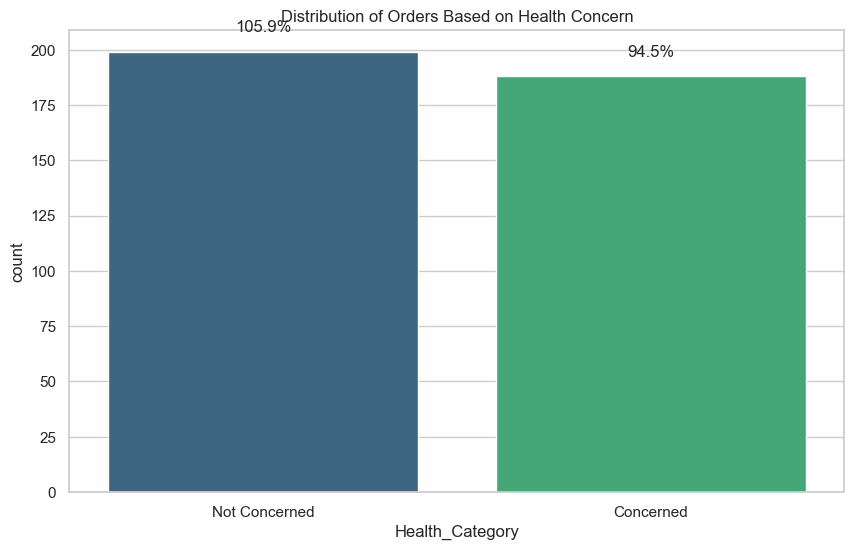

In [112]:
# 7: Classify Based on health-concerned or not-concerned and Plot Bar Plot -
# Read the dataset
df = pd.read_csv("Data/cleaned_dataset.csv")

# Classify 'Health Concern' into categories
df['Health_Category'] = df['Health Concern'].apply(lambda x: 'Concerned' if x == 'Agree' or x == 'Strongly agree' else 'Not Concerned')

# Set the style for Seaborn
sns.set(style="whitegrid")

# Plot a countplot using Seaborn, assigning 'Health_Category' to 'hue'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Health_Category', data=df, hue='Health_Category', palette="viridis", dodge=False)

# Adding percentage labels to the bars, 
# groupby() => to group similar kind of data like concern and not-concerned separately 

total_orders_by_health = df.groupby('Health_Category').size()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_orders_by_health.iloc[round(p.get_x())])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * len(df)
    ax.text(x, y, percentage, ha='center', va='bottom')

plt.title('Distribution of Orders Based on Health Concern')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

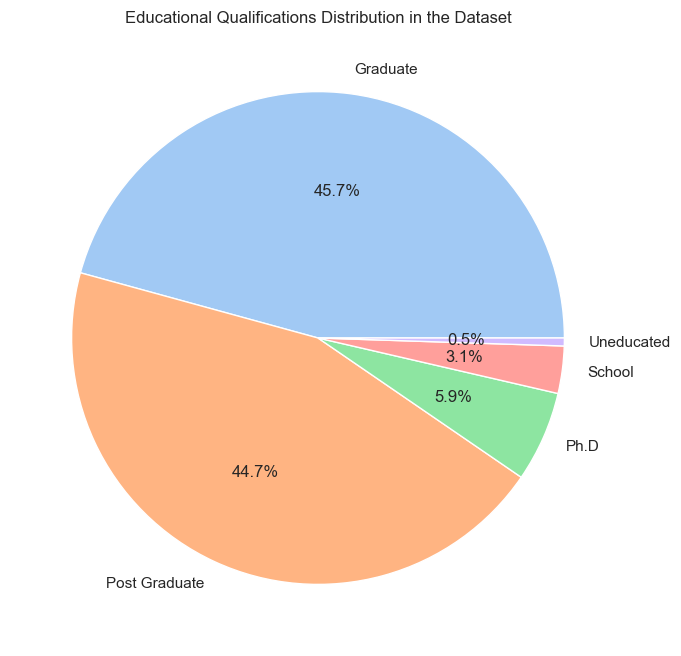

In [113]:
# 8 classification idea: Education Level.
# Load the dataset from a CSV file
file_path = 'Data/cleaned_dataset.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Classify based on Educational Qualifications
edu_distribution = df['Educational Qualifications'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(edu_distribution, labels=edu_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Educational Qualifications Distribution in the Dataset')
plt.show()

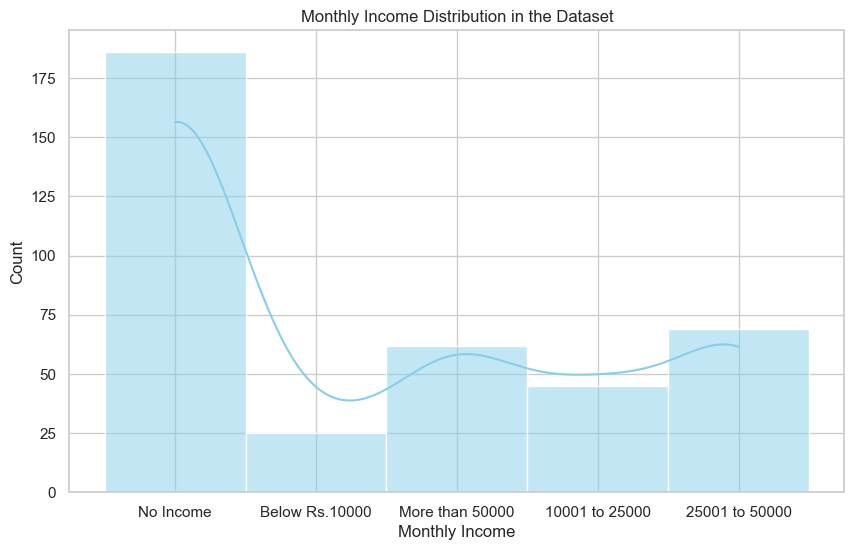

In [114]:
# Monthly Income distribution, kde => kernel estimate data => add curve for data , for medium data , set bins = 20 , 
# for small data , bins = 10 , for complete large-data set bins >=30 => proper analysis of data 
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly Income'], bins=20, kde=True, color='skyblue')
plt.title('Monthly Income Distribution in the Dataset')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.show()

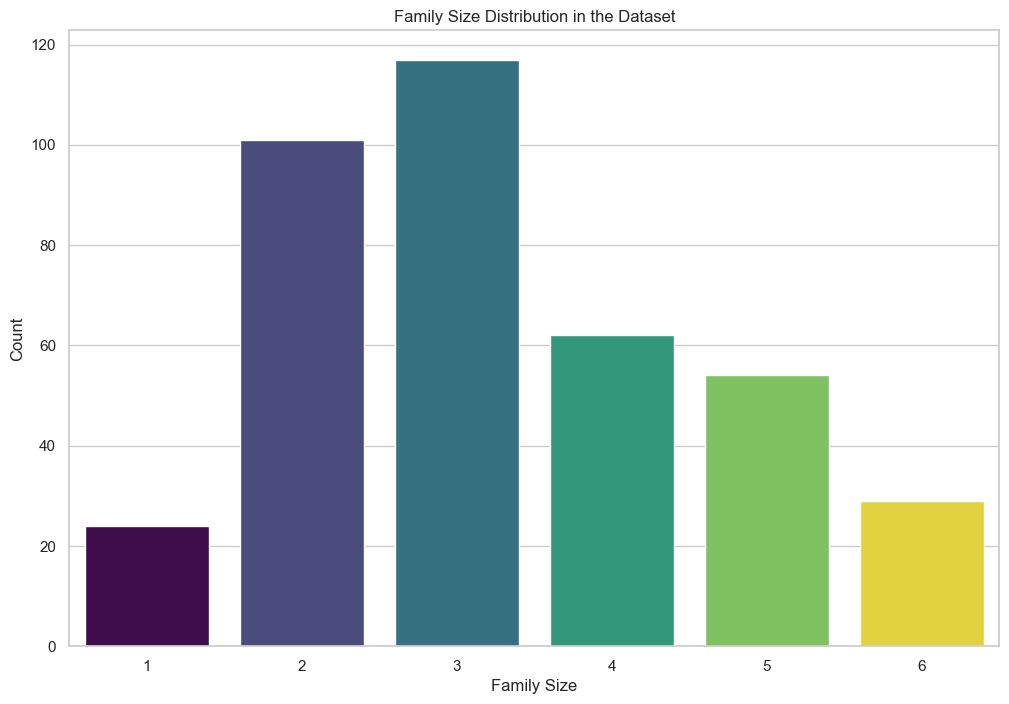

In [115]:
# Family Size distribution
family_size_distribution = df['Family size'].value_counts()

# Plotting with hue and without legend
plt.figure(figsize=(12, 8))
sns.barplot(x=family_size_distribution.index, y=family_size_distribution.values, hue=family_size_distribution.index, palette='viridis', dodge=False)
plt.title('Family Size Distribution in the Dataset')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend().set_visible(False)  # Hide legend
plt.show()

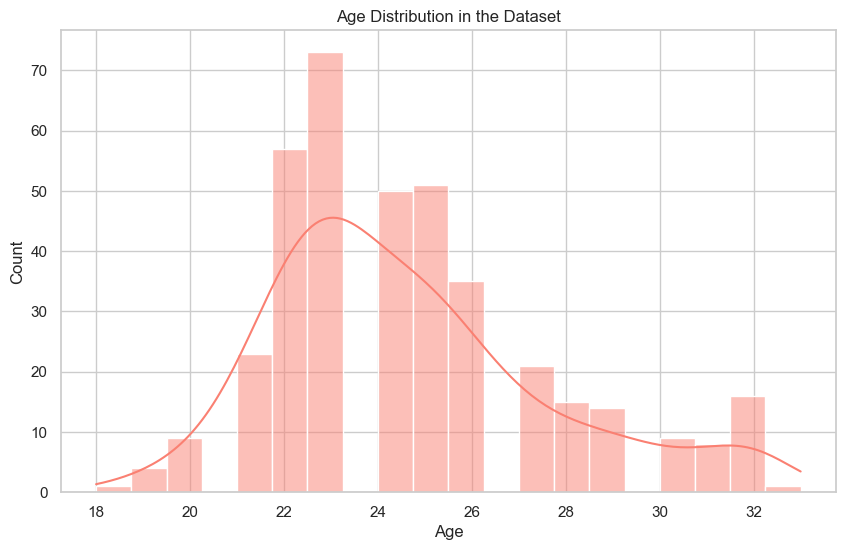

In [116]:
# Age distribution, 
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution in the Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

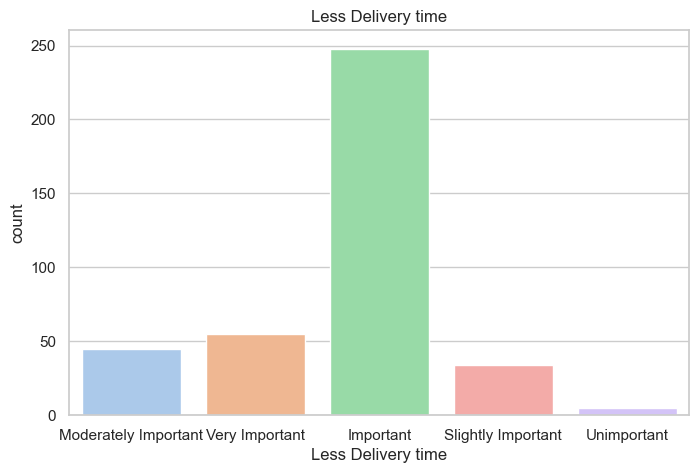

In [117]:
# classify Less Delivery time
# Set a custom color palette
colors = sns.color_palette('pastel')

# Plotting Less Delivery time
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Less Delivery time', palette=colors[:5],  hue='Less Delivery time', dodge=False)
plt.title('Less Delivery time')
plt.show()

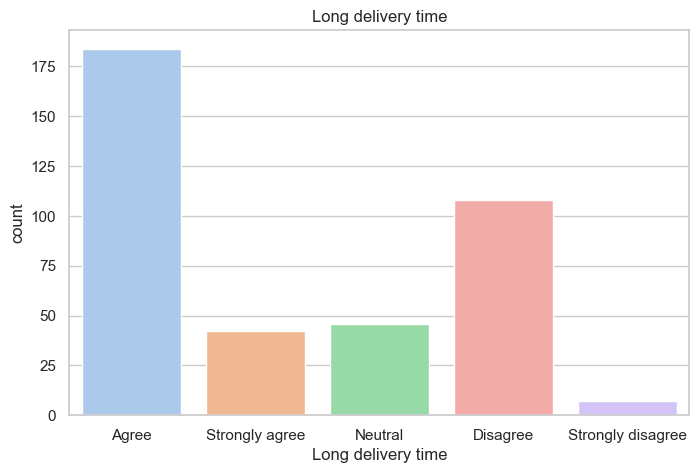

In [118]:
# Classify Long delivery time
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Long delivery time', hue='Long delivery time', palette=colors[:5], dodge=False)
plt.title('Long delivery time')
plt.show()

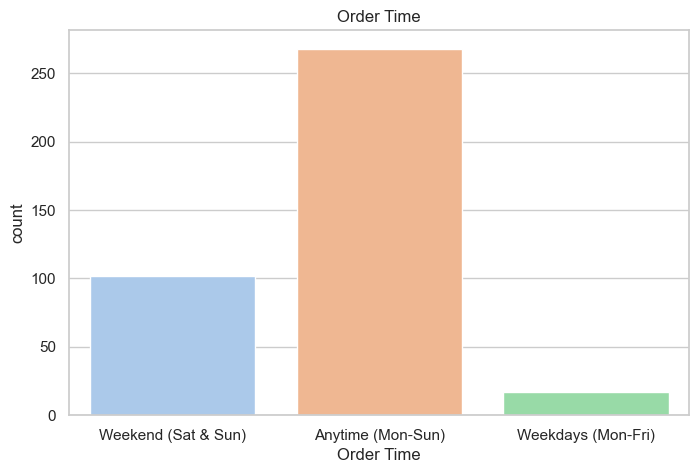

In [119]:
# Classify Order Time
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Order Time',hue='Order Time', palette=colors[:3], dodge=False)
plt.title('Order Time')
plt.show()

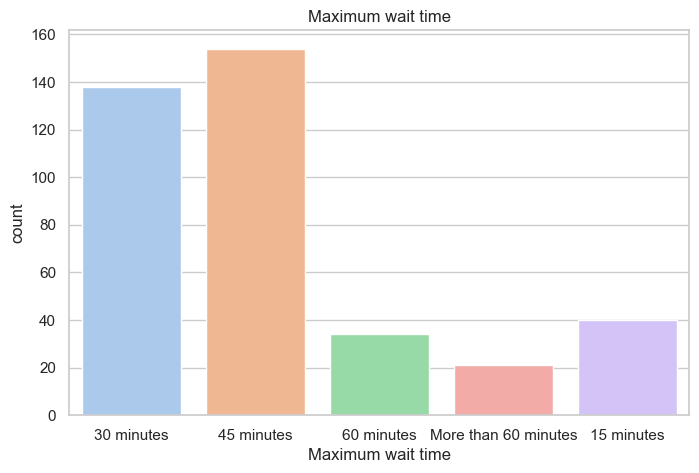

In [120]:
# Classify Maximum wait time
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Maximum wait time', hue='Maximum wait time', palette=colors[:5], dodge=False)
plt.title('Maximum wait time')
plt.show()

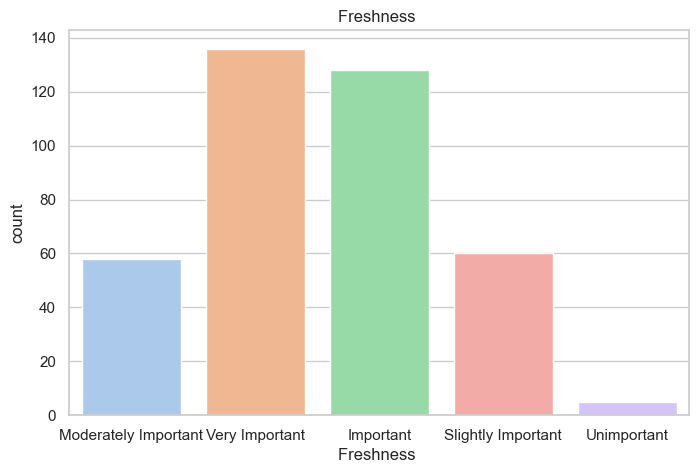

In [121]:
# classify Freshness, spacing matters =>column-name is  (Freshness-)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Freshness ', hue='Freshness ', palette=colors[:5], dodge=False)
plt.title('Freshness ')
plt.show()

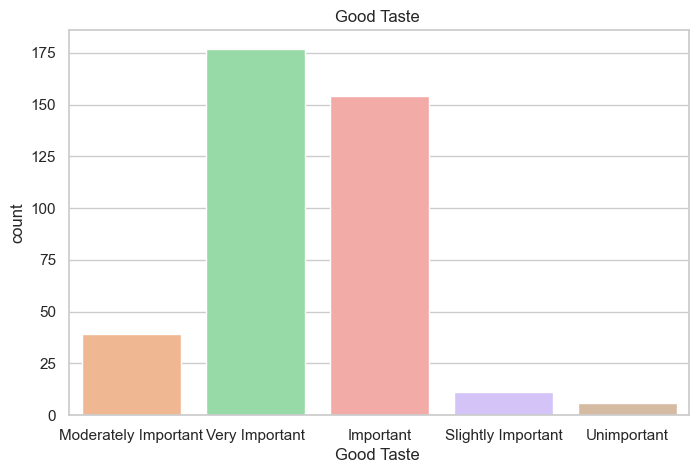

In [122]:
# classify Good Taste , space matters again here in csv file 
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Good Taste ',hue='Good Taste ',  palette=colors[1:6], dodge=False)
plt.title('Good Taste ')
plt.show()

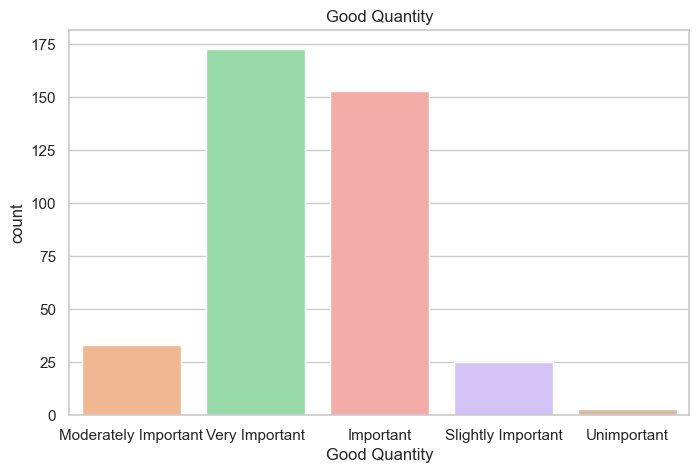

In [123]:
# Classify Good Quantity
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Good Quantity',hue='Good Quantity',  palette=colors[1:6], dodge=False)
plt.title('Good Quantity')
plt.show()

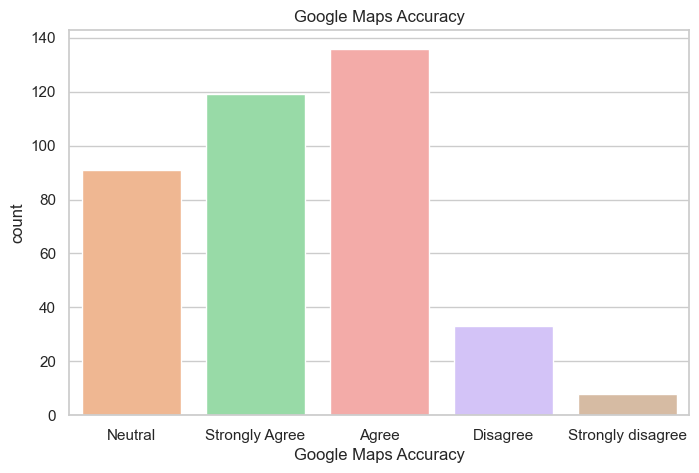

In [124]:
# Classify Google Maps Accuracy
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Google Maps Accuracy', hue='Google Maps Accuracy', palette=colors[1:6], dodge=False)
plt.title('Google Maps Accuracy')
plt.show()

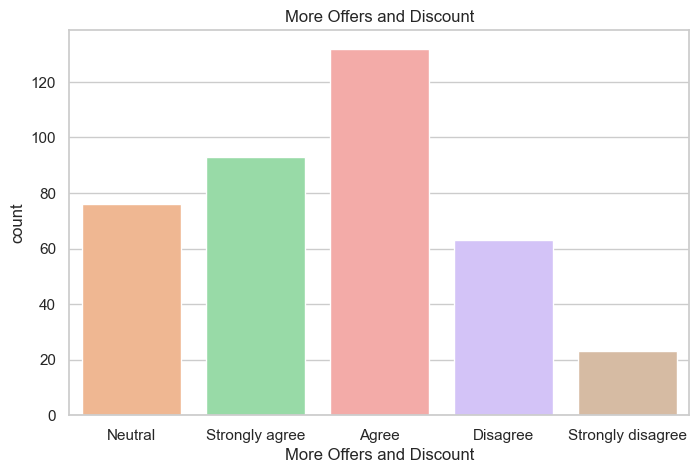

In [125]:
# Classify More Offers and Discount
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='More Offers and Discount', hue='More Offers and Discount', palette=colors[1:6], dodge=False)
plt.title('More Offers and Discount')
plt.show()

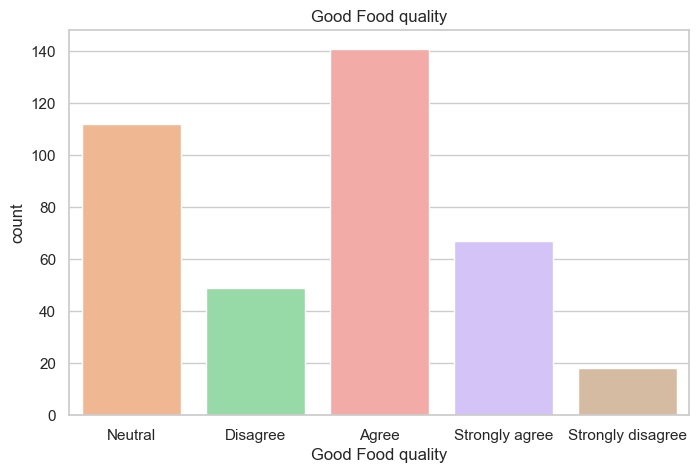

In [126]:
# Classify Good Food quality
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Good Food quality',hue='Good Food quality' , palette=colors[1:6], dodge=False)
plt.title('Good Food quality')
plt.show()

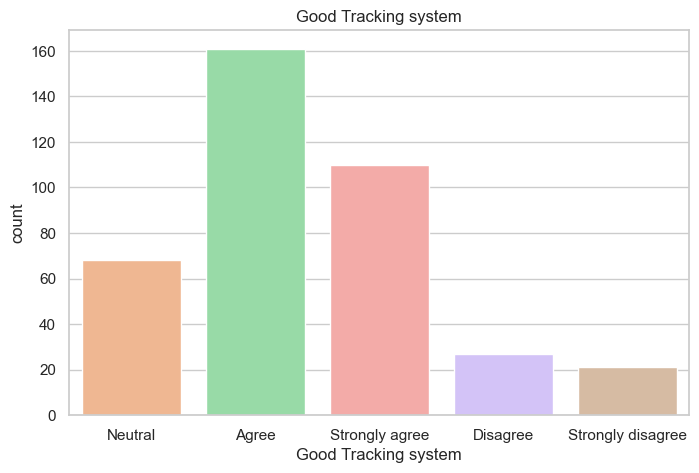

In [127]:
# Classify Good Tracking system
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Good Tracking system', hue='Good Tracking system',palette=colors[1:6], dodge=False)
plt.title('Good Tracking system')
plt.show()

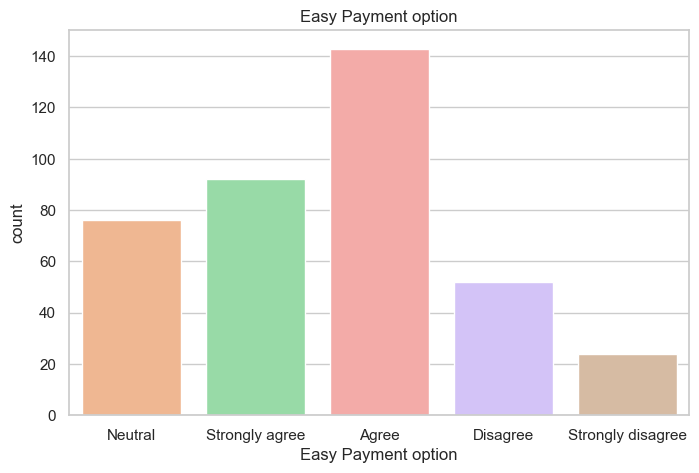

In [128]:
# Classify Easy Payment option
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Easy Payment option', hue='Easy Payment option', palette=colors[1:6], dodge=False)
plt.title('Easy Payment option')
plt.show()

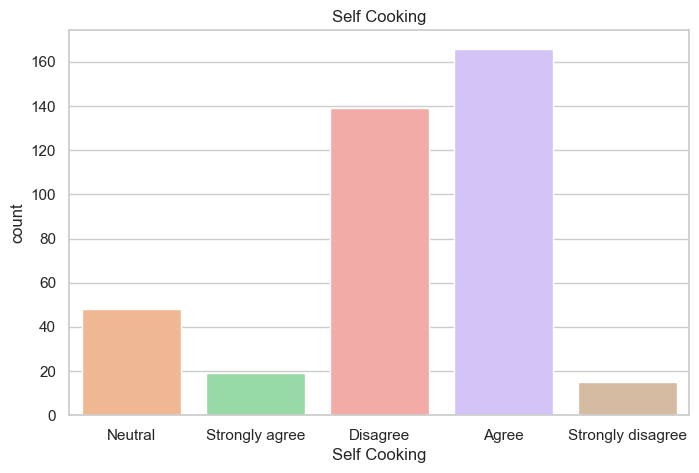

In [129]:
# Classify Self Cooking
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Self Cooking', hue='Self Cooking', palette=colors[1:6], dodge=False)
plt.title('Self Cooking')
plt.show()

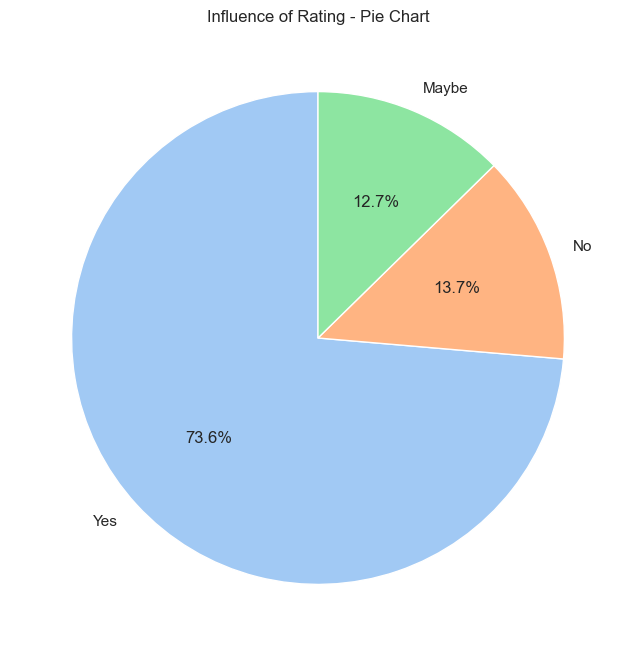

In [130]:
# Pie Chart for Influence of Rating
plt.figure(figsize=(8, 8))
influence_rating_counts = df['Influence of rating'].value_counts()
plt.pie(influence_rating_counts, labels=influence_rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Influence of Rating - Pie Chart')
plt.show()

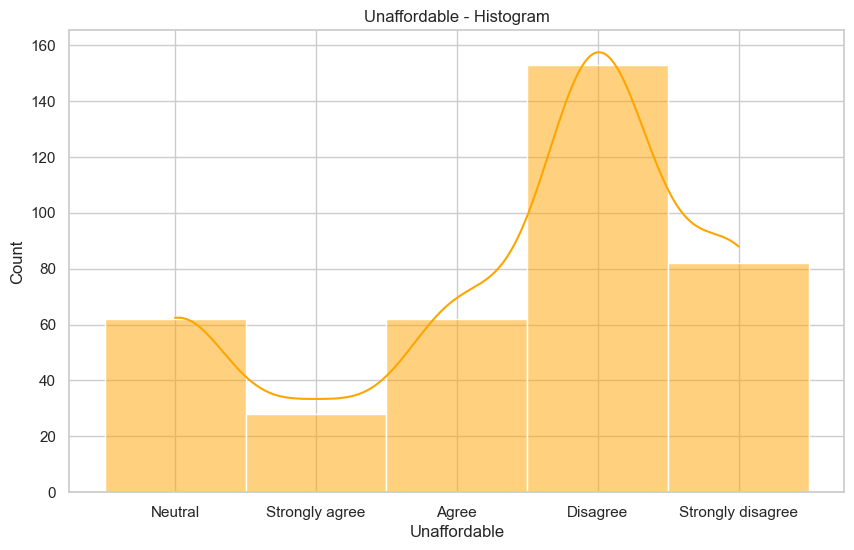

In [131]:
# Histogram for Unaffordable
plt.figure(figsize=(10, 6))
sns.histplot(df['Unaffordable'], bins=20, kde=True, color='orange')
plt.title('Unaffordable - Histogram')
plt.xlabel('Unaffordable')
plt.ylabel('Count')
plt.show()

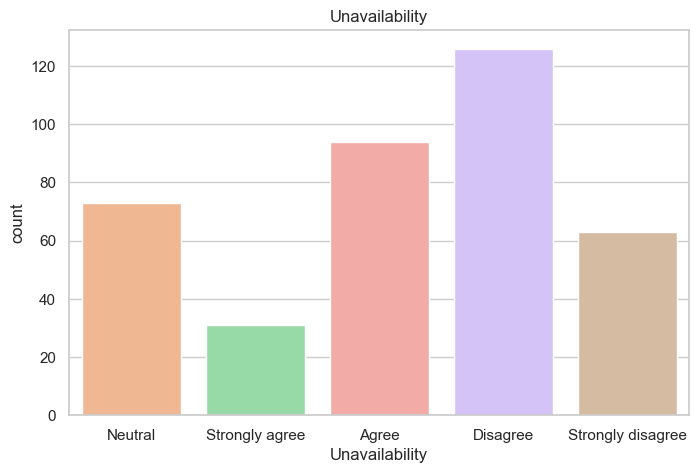

In [132]:
# Classify Unavailability
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Unavailability', hue='Unavailability', palette=colors[1:6], dodge=False)
plt.title('Unavailability')
plt.show()

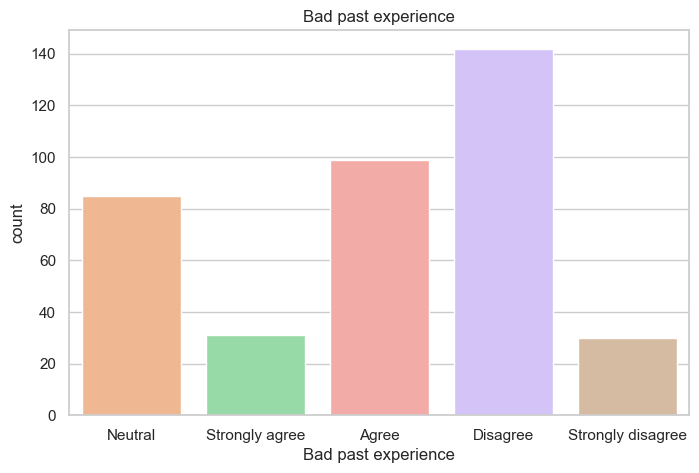

In [133]:
# Classify Bad past experience
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Bad past experience', hue='Bad past experience', palette=colors[1:6], dodge=False)
plt.title('Bad past experience')
plt.show()

In [144]:
import numpy as np
import scipy

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        if isinstance(z, np.ndarray):
            return 1 / (1 + np.exp(-z))
        elif isinstance(z, (scipy.sparse.spmatrix, scipy.sparse.csr_matrix, scipy.sparse.csc_matrix)):
            return 1 / (1 + np.exp(-z.toarray()))
        else:
            raise ValueError(f"Unsupported type for sigmoid: {type(z)}")

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Calculate predicted probabilities
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Predict probabilities
        y_pred_proba = self.sigmoid(np.dot(X, self.weights) + self.bias)
        # Convert probabilities to binary predictions
        y_pred = np.where(y_pred_proba >= 0.5, 1, 0)
        return y_pred

In [145]:
# Assume you have a DataFrame df with the selected features and the target variable 'Output'

selected_features = ['Age', 'Gender', 'Monthly Income', 'Educational Qualifications', 'Family size', 'Health Concern', 'Unavailability', 'Long delivery time']
X = df[selected_features].values
y = df['Output'].values

In [146]:
# standardize 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numeric and categorical columns
numeric_columns = np.where(np.isin(selected_features, df.select_dtypes(include=np.number).columns))[0]
categorical_columns = np.where(~np.isin(selected_features, df.select_dtypes(include=np.number).columns))[0]

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ])

# Fit and transform the data
X_scaled = preprocessor.fit_transform(X)

In [147]:
# Create an instance of the LogisticRegressionGD class
model = LogisticRegressionGD(learning_rate=0.01, num_iterations=1000)

In [ ]:
# fit() is not working